# Project: Data driven building simulation
By Michelle Wong, Luis Funes and Karla Pedroza

In this learning-machine code, we are using data taken from  paper:
"On-line learning of indoor temperature forecasting models towards energy efficiency"

It is data taken from  a solar-powered house. This studies the development viability of predictive systems for a totally unknown environment applying online learning techniques. 
The main idea  is to forecast the indoor temperature with other parameters such as: Outside temperature, room temperature, Irradiance and Lightning, in order to be integrated within the energy consumption and comfort levels of the house.


# #Starting the code:

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Importing the file of measured data. Creating a Dataframe with all parameters
DataFolderPath = "C:\Users\Karla\Documents\Notebooks\Project_Funes_Wong_Pedroza\datos_edificio.csv"
DF_temperature = pd.read_csv(DataFolderPath,sep=";",index_col=0)

In [5]:
#Changing the first column (time) as date time
previousIndex= DF_temperature.index
NewparsedIndex = pd.to_datetime(previousIndex)
DF_temperature.index= NewparsedIndex

In [6]:
#Function to calculate the lag, generating columns in excel file with a delay of time and save them in the current dataframe. 
def lag_column(df,column_names,lag_period=1):
#df              > pandas dataframe
#column_names    > names of column/columns as a list
#lag_period      > number of steps to lag ( +ve or -ve) usually postive 
#to include past values for current row 
    for column_name in column_names:
        column_name = [str(column_name)]
        for i in np.arange(1,lag_period+1,1):
            new_column_name = [col +'_'+str(i) for col in column_name]
            df[new_column_name]=(df[column_name]).shift(i)
    return df

In [7]:
#A list with all the chosen features to do the linear regression 
columnName=["Temperature_Exterior_Sensor","Temperature_Habitacion_Sensor","Weather_Temperature","Meteo_Exterior_Piranometro",
"Temperature_Exterior_Sensor","Temperature_Habitacion_Sensor","Lighting_Habitacion_Sensor","Meteo_Exterior_Sol_Sud",
"Meteo_Exterior_Crepusculo"]


In [8]:
#Using function in the list with the chosen features.
lag_column(DF_temperature,columnName,26)

,Temperature_Comedor_Sensor,Temperature_Habitacion_Sensor,Weather_Temperature,CO2_Comedor_Sensor,CO2_Habitacion_Sensor,Humedad_Comedor_Sensor,Humedad_Habitacion_Sensor,Lighting_Comedor_Sensor,Lighting_Habitacion_Sensor,Precipitacion,...,Meteo_Exterior_Crepusculo_17,Meteo_Exterior_Crepusculo_18,Meteo_Exterior_Crepusculo_19,Meteo_Exterior_Crepusculo_20,Meteo_Exterior_Crepusculo_21,Meteo_Exterior_Crepusculo_22,Meteo_Exterior_Crepusculo_23,Meteo_Exterior_Crepusculo_24,Meteo_Exterior_Crepusculo_25,Meteo_Exterior_Crepusculo_26
1:Date,,,,,,,,,,,,,,,,,,,,,
2012-03-13 11:45:00,18.1875,17.8275,0.0000,216.560,221.920,39.9125,42.4150,81.6650,113.5200,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 12:00:00,18.4633,18.1207,6.8000,219.947,220.363,39.9267,42.2453,81.7413,113.6050,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 12:15:00,18.7673,18.4367,17.0000,219.403,218.933,39.7720,42.2267,81.4240,113.6000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 12:30:00,19.0727,18.7513,18.0000,218.613,217.045,39.7760,42.0987,81.5013,113.3440,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 12:45:00,19.3721,19.0414,20.0000,217.714,216.080,39.7757,42.0686,81.4657,113.0340,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 13:00:00,19.6407,19.2773,20.0000,218.389,216.011,39.8107,42.0347,81.2427,113.6000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 13:15:00,19.9120,19.5367,20.0000,218.155,215.829,39.8613,41.9947,81.3600,112.9810,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 13:30:00,20.1640,19.7307,20.0000,216.661,215.296,39.8240,41.9947,81.0240,111.2590,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-13 13:45:00,20.4120,19.9693,20.0000,217.461,214.549,39.9587,42.1253,81.1040,83.3547,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Saving an excel file with all lagged data
df_FinalDataSet=DF_temperature
df_FinalDataSet.to_csv("C:\Users\Karla\Documents\Notebooks\Project_Funes_Wong_Pedroza\datos_final.csv",sep=";")


In [25]:
#Eliminating all the NA values in the dataset
df_FinalDataSet_withLaggedFeatures=df_FinalDataSet
df_FinalDataSet_withLaggedFeatures.dropna(inplace=True)

In [26]:
#Definition of the function normalize to compute the deviation of each value wrt to its minimum and maximum
def normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [27]:
#Target is defined with the best subset of multiple variables
DF_target = df_FinalDataSet_withLaggedFeatures["Temperature_Comedor_Sensor"]
DF_features = df_FinalDataSet_withLaggedFeatures.drop("Temperature_Comedor_Sensor",axis=1)

In [28]:
#Normalizing all values, giving values from 0 to 1, dropping our target values.
df_FinalDataSet_withLaggedFeatures_norm = normalize(df_FinalDataSet_withLaggedFeatures)
DF_target_norm = df_FinalDataSet_withLaggedFeatures_norm["Temperature_Comedor_Sensor"]
DF_features_norm = df_FinalDataSet_withLaggedFeatures_norm.drop("Temperature_Comedor_Sensor",axis=1)

In [29]:
#Train test split is splitting the info so the system uses a part of this data to learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_features, DF_target, test_size=0.2, random_state=41234)

In [30]:
#Using linear regression to forecast the target values
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

linear_reg.fit(X_train, y_train)
predict_linearReg_split= linear_reg.predict(X_test)
predict_DF_linearReg_split=pd.DataFrame(predict_linearReg_split, index = y_test.index,columns=["Temperature_Comedor_Sensor_Predicted"])

predict_DF_linearReg_split = predict_DF_linearReg_split.join(y_test)

In [31]:
#Defining mean absolute and mean squared errors accoring to the forecasting and real values
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
class accuracy_metrics:
    def coeff_var(self,df,actual_col,predicted_col):
        y_actual_mean = df[actual_col].mean()
        mse = mean_squared_error(df[actual_col],df[predicted_col])
        return np.sqrt(mse)/y_actual_mean
    def mean_bias_err(self,df,actual_col,predicted_col):
        y_actual_mean = df[actual_col].mean()
        return mean_absolute_error(df[actual_col],df[predicted_col])/y_actual_mean
    def r2_score(self,df,actual_col,predicted_col):
        return r2_score(df[actual_col],df[predicted_col])


In [38]:
#Prints all the data previuosly calculated with the function accuracy metrics
def print_metrics(cv,mbe,r2):
    print "coefficient of variance = {:.2f}".format(cv)
    print "Mean bias error = {:.2f}".format(mbe)
    print "R Squared = {:.3f}".format(r2)

In [39]:
def get_metrics(df):
    metrics = accuracy_metrics()
    cv = metrics.coeff_var(df,df.columns[1],df.columns[0])*100
    mbe = (metrics.mean_bias_err(df,df.columns[1],df.columns[0])*100)
    r2 = metrics.r2_score(df,df.columns[1],df.columns[0])
    print_metrics(cv,mbe,r2)
    return cv, mbe, r2

In [40]:
#We can observe that the chosen features give us an R^2 of almost 1, which means that our approximation is very good
get_metrics(predict_DF_linearReg_split)

coefficient of variance = 1.26
Mean bias error = 0.82
R Squared = 0.993


(1.2617034911200775, 0.82405391850756859, 0.99282575080068058)

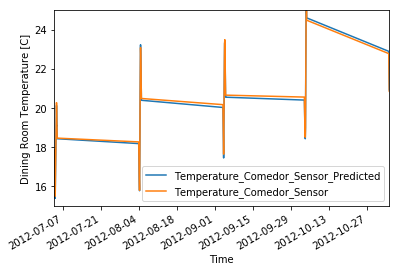

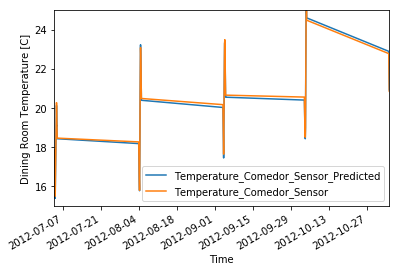

In [42]:
#Plotting the temperature of the dining room vs time.
predict_DF_linearReg_split['13/06/2012 11:45':'11/09/2012 6:30'].plot()
plt.xlabel('Time')
plt.ylabel('Dining Room Temperature [C]')
plt.ylim([15,25])
plt.show()

# Conclusions

According to the graph, we can conclude that all chosen features give us a good approximation of the actual value, this is because about 9 variables were included in the learning process.

We have chosen an interval of all the data to have a better comparison between the predicted values and the real ones. However, if all the data set was to be plotted, the difference would have been imperceptible between them.